# Categorising and Tagging Words
***

- Here we see how to classify words into different parts of speech like nouns and verbs. This would understandably a very useful thing in the context of NLP. And we shall thus see some famous techniques used in NLP for the same
- This process generally comes right after tokenisation, and is called *POS-tagging*
- Parts of speech are known as word *classes* or *lexical categories* 
- The collection of tags used for a particular task is called a *tagset*


# Approach 1: Using a Tagger

- A POS tagger can attach a part of speech tag to each word

In [1]:
import nltk

In [2]:
text = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

Here, NN is a noun, CC is a coordinating conjunction, IN is a preposition, RB is an adverb. One can query what each abbreviation is using `nltk.help.upenn_tagset('RB')`

The `pos_tag()` method is quite versatile, and can even handle homonyms, or gerunds, and loads of other confusing things

In [3]:
text = nltk.word_tokenize("The Dancing Women were dancing?")
nltk.pos_tag(text)

[('The', 'DT'),
 ('Dancing', 'NNP'),
 ('Women', 'NNP'),
 ('were', 'VBD'),
 ('dancing', 'VBG'),
 ('?', '.')]

This is essentially the principle behind how the `similar()` method works. It takes a word w, appearing in a context, say w<sub>1</sub>ww<sub>2</sub> and finds all words w' which appear as w<sub>1</sub>w'w<sub>2</sub>

# Approach 2: Tagged Corpora

### Representation

- Text Corpora often come with words tagged with their POS as 'word/POS' in the string itself.
- Bringing a word and its type from string into standard tuple form is accomplished with the `tag.str2tuple()` function  

In [4]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.'''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

Generally corpora have different formats for their POS tags, but NLTK is standardised to the Brown format so we don't have to worry about that

In [5]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

If reading the abbreviations is hard, try using the universal tagset

In [6]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

### Some Actual Coding? 

Let's now visualise the POS distribution in the Brown Dataset

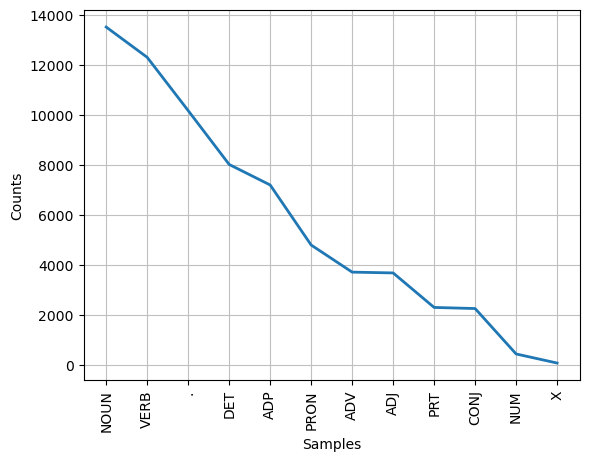

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
from nltk.corpus import brown

brown_fiction = brown.tagged_words(categories='fiction',tagset='universal')
tag_dist = nltk.FreqDist(tag for (word,tag) in brown_fiction)
tag_dist.most_common()
tag_dist.plot()

Most of the words are nouns, verbs, punctuation or determiners

***
# Now Let's Do Some Analysis

## 1. Nouns

Let's see what types of words normally come in before a noun, we can do this with bigrams

In [8]:
pairs = nltk.bigrams(brown_fiction)
pre_noun = [a[1] for (a,b) in pairs if b[1]=='NOUN']
fdist = nltk.FreqDist(pre_noun)
[tag for (tag,_) in fdist.most_common()]

['DET',
 'ADJ',
 'ADP',
 'NOUN',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

Looks like determiners and adjectives are what usually precede nouns in fiction

## 2. Verbs

What verbs are most used in the Wall Street Journal?

In [9]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
tagged = nltk.FreqDist(wsj)
[w[0] for (w,_) in tagged.most_common() if w[1]=='VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


Now let's go back to homonyms, you can think of a homonym word as a condition, and its tag as an event. Essentially, if the word 'refuse' comes up, is it a noun? or an adjective? or a verb?
We can use a conditional frequency distribution to see this

In [10]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

We can also do the reverse here, using tag as a condition and the word as an event

In [11]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag,word) for (word,tag) in wsj)
list(cfd2['VBN'])

['been',
 'expected',
 'made',
 'compared',
 'based',
 'used',
 'priced',
 'sold',
 'named',
 'designed',
 'held',
 'fined',
 'taken',
 'paid',
 'traded',
 'increased',
 'said',
 'filed',
 'reached',
 'called',
 'scheduled',
 'disclosed',
 'reported',
 'proposed',
 'estimated',
 'set',
 'known',
 'built',
 'approved',
 'given',
 'acquired',
 'found',
 'offered',
 'received',
 'caused',
 'considered',
 'ordered',
 'required',
 'preferred',
 'led',
 'issued',
 'fixed',
 'listed',
 'prepared',
 'involved',
 'aimed',
 'needed',
 'launched',
 'produced',
 'put',
 'planned',
 'seen',
 'alleged',
 'valued',
 'barred',
 'become',
 'related',
 'improved',
 'changed',
 'provided',
 'come',
 'got',
 'allowed',
 'mixed',
 'suspended',
 'owned',
 'elected',
 'worried',
 'completed',
 'combined',
 'raised',
 'left',
 'placed',
 'invested',
 'fallen',
 'failed',
 'helped',
 'run',
 'opposed',
 'quoted',
 'continued',
 'threatened',
 'offset',
 'shipped',
 'eliminated',
 'followed',
 'sought',
 'hurt'

We can also use this to see how some words can be different parts of speech at once, for example, past participle and past tense

In [12]:
cfd1 = nltk.ConditionalFreqDist(wsj)
can_be_both = [w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]
can_be_both

['named',
 'used',
 'caused',
 'reported',
 'said',
 'stopped',
 'heard',
 'studied',
 'led',
 'replaced',
 'sold',
 'worked',
 'died',
 'found',
 'rejected',
 'imposed',
 'made',
 'dumped',
 'imported',
 'mixed',
 'described',
 'continued',
 'ended',
 'thought',
 'reached',
 'had',
 'approved',
 'completed',
 'suspended',
 'lifted',
 'dropped',
 'voted',
 'settled',
 'decided',
 'followed',
 'welcomed',
 'held',
 'banned',
 'pointed',
 'squeezed',
 'fed',
 'registered',
 'released',
 'increased',
 'forecast',
 'recorded',
 'announced',
 'offered',
 'lowered',
 'spent',
 'proposed',
 'got',
 'added',
 'noted',
 'turned',
 'closed',
 'retired',
 'ordered',
 'required',
 'received',
 'moved',
 'determined',
 'changed',
 'upheld',
 'set',
 'estimated',
 'compared',
 'opened',
 'tied',
 'filed',
 'disclosed',
 'anticipated',
 'attached',
 'called',
 'applied',
 'favored',
 'posted',
 'paid',
 'removed',
 'accelerated',
 'placed',
 'vowed',
 'deemed',
 'prompted',
 'complained',
 'believed'

In [13]:
idx1 = wsj.index(('accepted','VBD'))
wsj[idx1-3:idx1+1]

[('So', 'IN'), ('both', 'DT'), ('sides', 'NNS'), ('accepted', 'VBD')]

In [14]:
idx2 = wsj.index(('accepted','VBN'))
wsj[idx2-3:idx2+1]

[('many', 'JJ'),
 ('practices', 'NNS'),
 ('historically', 'RB'),
 ('accepted', 'VBN')]

***
# Unsimplify the tags now

Till now we were dealing with simple tags which just gave us part of speech information. But a lot more can be encoded in tags, for example part of text - headings, citations, titles, or types of nouns - possessive, plural, proper

In [15]:
def find_tags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag,word) for (word,tag) in tagged_text 
                                    if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tag_dict = find_tags('NN',nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tag_dict):
    print(tag,tag_dict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

Now let's do some even more complex analysis. Effectively we want to be able to use tags as comfortably as regular expressions. Let's try '<Verb> To <Verb>'

In [16]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

# Approach 3: Python Dictionary Maps

In [17]:
from collections import defaultdict
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [w for (w,_) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'OOV')
for v in v1000:
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
alice2[:100]


['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'OOV',
 'OOV',
 'OOV',
 'OOV',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'OOV',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'OOV',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

In [18]:
counts = defaultdict(int)
from nltk.corpus import brown
for (word,tag) in brown.tagged_words(categories='news',tagset='universal'):
    counts[tag]+=1
counts['NOUN']

30654

In [19]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [20]:
from operator import itemgetter
sorted(counts.items(),key=itemgetter(1), reverse=True)
[t for t,c in sorted(counts.items(),key=itemgetter(1),reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

Let's use `defaultdict` to create an anagram dictionary

In [21]:
anagrams = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

As you can see, `defaultdict` provides a very useful way to accumulate words, thus there is inbuilt support for this, `nltk.Index()' creates a 'defaultdict(list)'

In [22]:
anagrams2 = nltk.Index((''.join(sorted(w)),w) for w in words)
anagrams2 == anagrams

True

In case you didn't see it, 'nltk.Index()' is a `defaultdict(list)` with initialisation, while `nltk.FreqDist()` is a 'defaultdict(int)` with initialisation.

# Automatic Tagging

Tags depend on the word and also its context in a sentence. So first let us try tagging sentences

In [23]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

## Default Tagger
First we should be able to assign the same tag to every token. So let's assign everything the most common tag

In [24]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
common = nltk.FreqDist(tags).max()
default_tagger = nltk.DefaultTagger(common)
default_tagger.accuracy(brown_tagged_sents)

0.13089484257215028

... As expected, this was not very accurate. It gets about 13% of the words right. Now let's try tagging based on spelling patterns

## RegEx Tagger

- First we prepare an intuitive list

In [25]:
patterns = [
    (r'.*ing$','VBG'),                             # Gerund
    (r'.*ed$','VBD'),                              # Simple past
    (r'.*es$','VBZ'),                              # 3rd Singular Present
    (r'.*ould$','MD'),                             # Modal
    (r'.*\'s$','NN$'),                             # Possessive Noun
    (r'.*s$','NNS'),                               # Plural Noun
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),              # Cardinals
    (r'.*','NN')                                   # Nouns (Default)
]

In [26]:
regex_tagger = nltk.RegexpTagger(patterns)
regex_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

You can already see some of its mistakes, like prepositions, conjunctions, punctuation, adverbs etc.

In [27]:
regex_tagger.accuracy(brown_tagged_sents)

0.20186168625812995

Okay we have some improvement, but still we get only about one in five words right. Also note that for the default case, our tagger is much less efficient

## Lookup Tagger

Some obvious words that are extremely common but our regex tagger will get wrong are things like 'the', 'of', 'and'. We've already seen how things like this and punctuation make up half the tokens of any corpora. So let's just make a dictionary for the 100 most common such words and base a new tagger that just looks up this dictionary to tag words

In [28]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.accuracy(brown_tagged_sents)

0.45578495136941344

- We reached almost 50% accuracy! Now let's also put a default NN tag.
- Using backoff, we can assign a default tag to words which are not in the the look 

In [29]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,backoff=nltk.DefaultTagger('NN'))

Now let's try to compare the performance of all the different taggers

In [30]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.accuracy(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

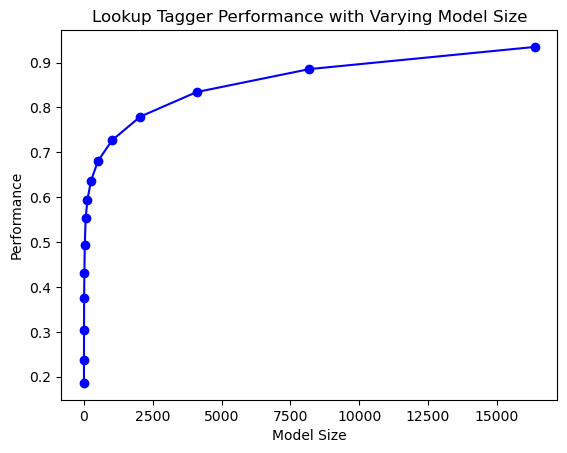

In [31]:
display()

# 5. N-Gram Tagging

We are slowly getting into the machine learning part of NLP. An N-Gram Tagger trains on some existing data, and then assigns new data the most likely tag. The 'N' refers to how many words at a time it considers (for purposes of context)

## Unigram Tagger

In [32]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2022])

[('They', 'PPSS'),
 ('are', 'BER'),
 ('accused', 'VBN'),
 ('of', 'IN'),
 ('whisking', 'VBG'),
 ('secrets', 'NNS'),
 ('out', 'RP'),
 ('of', 'IN'),
 ('naval', 'JJ'),
 ('strongrooms', 'NNS'),
 ('over', 'IN'),
 ('which', 'WDT'),
 ('they', 'PPSS'),
 ('kept', 'VBD'),
 ('guard', 'NN'),
 ('.', '.')]

In [33]:
unigram_tagger.accuracy(brown_tagged_sents)

0.9349006503968017

Using a typical concept from ML, we separate the data into training and testing set (90-10). This will tell us the actual usefulness of our tagger when tagging new text

In [34]:
size = int(len(brown_tagged_sents)*0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.accuracy(test_sents)

0.8121200039868434

## Bigram Tagging

In [35]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.accuracy(test_sents)

0.10206319146815508

- Why does the bigram tagger perform so poorly? Simply put, because the bigram tagger needs context, and it simply doesn't have enough data in the training set to help it out in the testing set
- The bigram tagger will not be able to tag any words it has seen before if they are preceded by words it hasn't seen before
- This problem only gets worse as you increase the 'N', it is known as the **sparse data** problem, and presents the tradeoff between accuracy and coverage of the results
- Also note that N-gram tagger normally work within sentences. All tokens before the period are set to None in the n-gram.
- One can already suggest a fix, try the bigram tagger first, and use the unigram tagger as the backoff 

In [36]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.TrigramTagger(train_sents,backoff=t2)
t3.accuracy(test_sents)

0.843317053722715

### Dealing with OOV?
- You could just go back to regex tagger to deal with out-of-vocabulary items but ideally we want to use the contextual information that our tagger learned as well
- One way to do this is to limit the tagger's vocabulary to the n most common words, and replace the other words with a special OOV word (usually 'UNK')
- During the training, the tagger will learn what to do with the UNK word based on context alone

## Saving a Tagger
It takes a lot of time and effort to train a tagger, so one can save a tagger using Python's Pickle module

In [37]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [38]:
from pickle import load
input = open('t2.pkl','rb')
tagger = load(input)
input.close()

## Understanding our Performance

One way to check this is to see how many times our tagger feels confused when analyzing a token. How many % of times does it face an ambiguous context?

In [39]:
cfd = nltk.ConditionalFreqDist(
           ((x[1], y[1], z[0]), z[1])
           for sent in brown_tagged_sents
           for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N()

0.049297702068029296

The answer turns out to be roughly 5% for the trigram tagger.

We can also see the mistakes of the tagger, these are commonly visualised as a confusion matrix

In [40]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                for (word,tag) in t3.tag(sent)]
gold_tags = [tag for (word,tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags,test_tags))


           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

POS-tagging has played a crucial role in the statistical treatment of NLP. The sheer accuracy of them was a demonstration to the early 90's that part-of-speech disambiguition can be solved without reference to deeper sources of linguistic knowledge. But now let's push this idea even further

# 6. Transformation Based Tagging

- One big problem with n-gram tagging as you can already tell is size. A good tagger trained on a large corpus would easily acquire a gigantic amount of entries which wouldn't perform well for practical purposes.
- Another problem is that context is not the same as a string of words before it. N-Gram taggers will not capture a true understanding of context as they rely on the exact preceding words and not any pattern or trend from them. 
- Now we see Brill tagging, named after its inventor Eric Brill. These have far smaller sizes with similar performances
- A Brill tagger guesses the tag of each word, and then goes back and fixes its mistakes. This is a supervised learning method, like n-gram tagging, since we do need annotated training data. However a Brill tagger learns a set of correcting rules, which help it to improve bad taggings rather than learn individual observations.


Now let's see NLTK's Brill tagger

In [41]:
from nltk.tbl import demo as brill
brill.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8358
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

## But How Do You Actually Decide a Category?

1. Morphology
Various suffixes can impart certain characteristics to a word. 'ment' can make a verb a noun, so can 'ness', 'ing' is used for present participle verbs and also gerunds

2. Syntax
Adjectives often precede nouns or are found after words like 'very', or verbs of the 'be' family

3. Semantics
While hard to formalise, the semantic criteria for word category is what most of us use intuitively. For example, nouns are the name of a person, place or a thing.

4. New Words
Nouns are an open class, while prepositions are a closed one. What this means is that when a language acquires new lexical items, it is likely to be a noun, and not a preposition. 

### Tagsets need not be the same
One could choose to categorise all verbs as just verbs, or differentiate the different forms of verbs. Similarly, tagsets may choose to be fine-grained or generic, depending on their purpose.

### Some More Notes
- There are still other types of tagging, for example using sense numbers, which attaches a bunch of numbers to each word depending on its various uses.
- Tagging can also be used on other things, like statements.


***
# Exercises

> ### Q15) Write programs to process the Brown Corpus and find answers to the following questions:
>1. Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s >suffix.)
>2. Which word has the greatest number of distinct tags. What are they, and what do they represent?
>3. List tags in order of decreasing frequency. What do the 20 most frequent tags represent?
>4. Which tags are nouns most commonly found after? What do these tags represent?

In [42]:
brown_tagged_words = brown.tagged_words(categories='fiction')
relevant_pairs = [pair for pair in brown_tagged_words if pair[1] in ['NN', 'NNS']]
fdist = nltk.FreqDist(relevant_pairs)
seen_words = []
for pair in relevant_pairs:
    plural_pair = (pair[0] + 's', 'NNS')
    if pair[0] not in seen_words and pair[1] == 'NN' and plural_pair in relevant_pairs and fdist[pair] < fdist[plural_pair]:
        print(pair[0], ': singular ', fdist[pair], ', plural ', fdist[plural_pair])
        seen_words.append(pair[0])

term : singular  2 , plural  4
height : singular  1 , plural  2
ear : singular  5 , plural  6
question : singular  5 , plural  11
wing : singular  2 , plural  6
slipper : singular  1 , plural  3
eye : singular  17 , plural  60
cover : singular  5 , plural  6
leg : singular  5 , plural  11
field : singular  5 , plural  7
footstep : singular  1 , plural  2
beam : singular  1 , plural  2
rifle : singular  3 , plural  5
guard : singular  4 , plural  7
finger : singular  6 , plural  13
friend : singular  4 , plural  11
ship : singular  2 , plural  7
soldier : singular  9 , plural  10
bastard : singular  5 , plural  8
mountain : singular  3 , plural  5
step : singular  5 , plural  18
emotion : singular  4 , plural  8
flower : singular  5 , plural  8
minute : singular  6 , plural  12
thing : singular  30 , plural  31
song : singular  2 , plural  3
angel : singular  1 , plural  2
dollar : singular  4 , plural  5
argument : singular  1 , plural  2
tree : singular  6 , plural  17
star : singular

In [43]:
from collections import Counter
tagged_set = set(brown_tagged_words)
data = Counter(word for (word, tag) in tagged_set)
word_most_tags = data.most_common(1)[0][0]
print(word_most_tags)
for (word, tag) in tagged_set:
    if word == word_most_tags:
        print(tag)
        print(nltk.help.brown_tagset(tag))

that
QL
QL: qualifier, pre
    well less very most so real as highly fundamentally even how much
    remarkably somewhat more completely too thus ill deeply little overly
    halfway almost impossibly far severly such ...
None
CS
CS: conjunction, subordinating
    that as after whether before while like because if since for than altho
    until so unless though providing once lest s'posin' till whereas
    whereupon supposing tho' albeit then so's 'fore
None
WPO
WPO: WH-pronoun, accusative
    whom that who
None
DT
DT: determiner/pronoun, singular
    this each another that 'nother
None
WPS
WPS: WH-pronoun, nominative
    that who whoever whosoever what whatsoever
None


In [44]:
tags = [tag for (word, tag) in brown_tagged_words]
fdist = nltk.FreqDist(tags)
for (tag, count) in fdist.most_common(20):
    print(f'{tag}:{count}')
    print(nltk.help.brown_tagset(tag))   

NN:7815
NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
None
IN:6012
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
None
AT:5439
AT: article
    the an no a every th' ever' ye
None
.:4804
.: sentence terminator
    . ? ; ! :
None
,:3654
,: comma
    ,
None
VBD:3027
VBD: verb, past tense
    said produced took recommended commented urged found added praised
    charged listed became announced brought attended wanted voted defeated
    received got stood shot scheduled feared promised made ...
None
JJ:2958
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate am

In [45]:
a_bigrams = list(nltk.bigrams(brown_tagged_words))
relevant = [tag1 for ((word1,tag1),(word2,tag2)) in a_bigrams if tag2[0]=='N']
fdist = nltk.FreqDist(relevant)
for (tag,count) in fdist.most_common(20):
    print(f'{tag}:{count}')
    print(nltk.help.brown_tagset(tag))

AT:3840
AT: article
    the an no a every th' ever' ye
None
JJ:1706
JJ: adjective
    ecent over-all possible hard-fought favorable hard meager fit such
    widespread outmoded inadequate ambiguous grand clerical effective
    orderly federal foster general proportionate ...
None
IN:1369
IN: preposition
    of in for by considering to on among at through with under into
    regarding than since despite according per before toward against as
    after during including between without except upon out over ...
None
PP$:1230
PP$: determiner, possessive
    our its his their my your her out thy mine thine
None
NN:617
NN: noun, singular, common
    failure burden court fire appointment awarding compensation Mayor
    interim committee fact effect airport management surveillance jail
    doctor intern extern night weekend duty legislation Tax Office ...
None
.:563
.: sentence terminator
    . ? ; ! :
None
NP:368
NP: noun, singular, proper
    Fulton Atlanta September-October Durwood Pye Ivan 

> ### Q18 Generate some statistics for tagged data to answer the following questions:
> 1. What proportion of word types are always assigned the same part-of-speech tag?
> 2. How many words are ambiguous, in the sense that they appear with at least two tags?
> 3. What percentage of word tokens in the Brown Corpus involve these ambiguous words?

In [46]:
cfd = nltk.ConditionalFreqDist(brown_tagged_words)
proportions = sum(1 for word in cfd if len(cfd[word])==1)/len(cfd)
ambiguous =  sum(1 for word in cfd if len(cfd[word]) > 1)

In [47]:
proportions

0.90851429800043

In [48]:
ambiguous

851

In [49]:
ambiguous/len(cfd)

0.09148570199956998